# For-Hire Vehicle Trip Records Exploratory Data Analysis (EDA)

In [1]:
!python -V

Python 3.8.12


install some packages

In [2]:
!pip install seaborn matplotlib sklearn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 2.2 MB/s eta 0:00:002.2 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=c88b23b5432f28b06a79b804e4192ccadbfed01231cde58bf51c3b055163574a
  Stored in directory: /home/desenfirma

In [3]:
import pandas as pd

In [4]:
import pickle

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

## Download the required data

In [7]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet -c -O data/fhv_tripdata_2021-01.parquet

--2022-05-19 04:23:37--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.139.201
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.139.201|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘data/fhv_tripdata_2021-01.parquet’

data/fhv_tripdata_2 100%[===================>]  11.33M  1.63MB/s    in 7.0s    

2022-05-19 04:23:46 (1.63 MB/s) - ‘data/fhv_tripdata_2021-01.parquet’ saved [11886281/11886281]



In [8]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet -c -O data/fhv_tripdata_2021-02.parquet

--2022-05-19 04:24:28--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 54.231.225.193
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|54.231.225.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘data/fhv_tripdata_2021-02.parquet’

data/fhv_tripdata_2 100%[===================>]  10.15M  1.44MB/s    in 14s     

2022-05-19 04:24:43 (725 KB/s) - ‘data/fhv_tripdata_2021-02.parquet’ saved [10645466/10645466]



In [9]:
!ls data/

fhv_tripdata_2021-01.parquet  fhv_tripdata_2021-02.parquet  README.md


## EDA and Preparation

In [79]:
df_2021_01 = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')

print(f"Columns: {df_2021_01.columns}")
df_2021_01.head()

Columns: Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [80]:
df_2021_02 = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')

print(f"Columns: {df_2021_02.columns}")
df_2021_02.head()

Columns: Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


## Question 1
January records

In [81]:
print(f"Total records: {df_2021_01.shape[0]} row(s)")

Total records: 1154112 row(s)


## Question 2
Average duration of January records FHV

In [82]:
print(f"Is pickup_datetime has null: { df_2021_01['pickup_datetime'].isnull().values.any() } ")
print(f"Is dropoff_datetime has null: { df_2021_01['dropOff_datetime'].isnull().values.any() } ")

Is pickup_datetime has null: False 
Is dropoff_datetime has null: False 


In [83]:
df_2021_01['duration'] = df_2021_01['dropOff_datetime'] - df_2021_01['pickup_datetime']
df_2021_01.duration = df_2021_01.duration.apply(lambda td: td.total_seconds() / 60)

print(f"Average duration: {df_2021_01['duration'].mean()}")

Average duration: 19.167224093791006


Also for February records

In [84]:
df_2021_02['duration'] = df_2021_02['dropOff_datetime'] - df_2021_02['pickup_datetime']
df_2021_02.duration = df_2021_02.duration.apply(lambda td: td.total_seconds() / 60)

print(f"Average duration: {df_2021_02['duration'].mean()}")

Average duration: 20.706986225199763


## Data Preparation for next question

In [85]:

# Only keep records with duration between 1 and 60 minutes (inclusive)
df_main = df_2021_01

df_main_no_outlier = pd.DataFrame(df_main[(df_main['duration'] >= 1) & (df_main['duration'] <= 60)])

print(f"Total records before: {df_main.shape[0]} row(s)")
print(f"Total records after: {df_main_no_outlier.shape[0]} row(s)")
print(f"Total records removed: {df_main.shape[0] - df_main_no_outlier.shape[0]} row(s)")
df_main_no_outlier.head()

Total records before: 1154112 row(s)
Total records after: 1109826 row(s)
Total records removed: 44286 row(s)


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


## Question 3

Missing value fraction

In [86]:

# Replace null values with -1 for PUlocationID and DOlocationID
df_main_no_outlier['PUlocationID'] = df_main_no_outlier['PUlocationID'].fillna("-1")
df_main_no_outlier['DOlocationID'] = df_main_no_outlier['DOlocationID'].fillna("-1")

fraction = df_main_no_outlier[df_main_no_outlier['PUlocationID'].map(lambda x: x == "-1")].shape[0] / df_main_no_outlier.shape[0]
print(f"Fraction of null values in PUlocationID: {fraction}")

# Treat categorical data as string
df_main_no_outlier['PUlocationID'] = df_main_no_outlier['PUlocationID'].astype(str)
df_main_no_outlier['DOlocationID'] = df_main_no_outlier['DOlocationID'].astype(str)
df_main_no_outlier

Fraction of null values in PUlocationID: 0.8352732770722617


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1,-1,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1,-1,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1,71.0,None,B00037,9.050000
...,...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266,8.750000
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,,57.600000
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285,16.200000
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285,19.433333


## Question 4

One hot encoding

In [87]:
train_dicts = df_main_no_outlier[['DOlocationID', 'PUlocationID']].to_dict('records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

print(f"Column dimensionalities: {X_train.shape[1]}")

Column dimensionalities: 525


## Question 5

Training Model

In [88]:
target = 'duration'
y_train = df_main_no_outlier[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

print(f"RMSE: {mean_squared_error(y_train, y_pred, squared=False)}")

RMSE: 10.528519388409808


## Question 6

Validation of Feb 2021 Data (RMSE)

In [95]:
# Prep data for validation

df_2021_02['duration'] = df_2021_02['dropOff_datetime'] - df_2021_02['pickup_datetime']
df_2021_02.duration = df_2021_02.duration.apply(lambda td: td.total_seconds() / 60)

df_validation = df_2021_02


df_validation = pd.DataFrame(df_validation[(df_validation['duration'] >= 1) & (df_validation['duration'] <= 60)])

# Replace null values with -1 for PUlocationID and DOlocationID
df_validation['PUlocationID'] = df_validation['PUlocationID'].fillna("-1")
df_validation['DOlocationID'] = df_validation['DOlocationID'].fillna("-1")

fraction = df_validation[df_validation['PUlocationID'].map(lambda x: x == "-1")].shape[0] / df_validation.shape[0]
print(f"Fraction of null values in PUlocationID: {fraction}")

# Treat categorical data as string
df_validation['PUlocationID'] = df_validation['PUlocationID'].astype(str)
df_validation['DOlocationID'] = df_validation['DOlocationID'].astype(str)
df_validation

Fraction of null values in PUlocationID: 0.8571354986754037


,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021,10.666667
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021,14.566667
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021,7.950000
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,-1,225.0,None,B00037,13.800000
5,B00037,2021-02-01 00:00:37,2021-02-01 00:09:35,-1,61.0,None,B00037,8.966667
...,...,...,...,...,...,...,...,...
1037687,B03282,2021-02-28 23:01:16,2021-02-28 23:14:48,-1,31.0,None,B01717,13.533333
1037688,B03282,2021-02-28 23:36:10,2021-02-28 23:47:38,-1,169.0,None,B01717,11.466667
1037689,B03285,2021-02-28 23:18:36,2021-02-28 23:43:59,28.0,171.0,None,B03285,25.383333
1037690,B03285,2021-02-28 23:26:34,2021-02-28 23:44:37,16.0,252.0,None,B03285,18.050000


In [96]:
val_dicts = df_validation[['DOlocationID', 'PUlocationID']].to_dict('records')

X_val = dv.transform(val_dicts)

target = 'duration'
y_val = df_validation[target].values

lr = LinearRegression()
lr.fit(X_val, y_val)

y_pred = lr.predict(X_val)

print(f"RMSE: {mean_squared_error(y_val, y_pred, squared=False)}")

RMSE: 10.958229154906785


Nearest: 11.01

/home/desenfirman/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/desenfirman/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


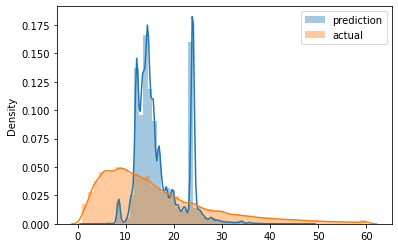

In [97]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()